In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyfonts import load_google_font

In [2]:
def time_to_unit(time_str: str, unit: str = "seconds") -> float:
    """
    Convert a time string like '5h:34m:27s' into the specified unit.

    Args:
        time_str: Time in format like '5h:34m:27s'
        unit: Target unit - 'seconds', 'minutes', or 'hours'

    Returns:
        float: Time converted into the specified unit
    """

    hours = minutes = seconds = 0

    if "h" in time_str:
        hours = int(time_str.split("h")[0])
        time_str = time_str.split("h", 1)[1]
    if "m" in time_str:
        minutes = int(time_str.split("m")[0].split(":")[-1])
        time_str = time_str.split("m", 1)[1]
    if "s" in time_str:
        seconds = int(time_str.split("s")[0].split(":")[-1])

    total_seconds = hours * 3600 + minutes * 60 + seconds

    if unit.lower() == "seconds":
        return total_seconds
    elif unit.lower() == "minutes":
        return total_seconds / 60
    elif unit.lower() == "hours":
        return total_seconds / 3600
    else:
        raise ValueError("Invalid unit. Choose 'seconds', 'minutes', or 'hours'.")

In [3]:
ncores2 = {
    "run10": ["5h:34m:27s"],
    "run1": ["5h:31m:55s"],
    "run2": ["5h:33m:27s"],
    "run3": ["5h:33m:36s"],
    "run4": ["5h:32m:33s"],
    "run5": ["5h:32m:22s"],
    "run6": ["5h:31m:28s"],
    "run7": ["5h:32m:19s"],
    "run8": ["5h:31m:30s"],
    "run9": ["5h:34m:34s"],
}

ncores4 = {
    "run10": ["2h:57m:57s"],
    "run1": ["2h:58m:36s"],
    "run2": ["2h:58m:27s"],
    "run3": ["2h:56m:5s"],
    "run4": ["2h:56m:5s"],
    "run5": ["2h:56m:49s"],
    "run6": ["2h:58m:43s"],
    "run7": ["2h:58m:21s"],
    "run8": ["2h:57m:7s"],
    "run9": ["2h:57m:5s"],
}

ncores8 = {
    "run10": ["1h:47m:14s"],
    "run1": ["1h:47m:38s"],
    "run2": ["1h:47m:46s"],
    "run3": ["1h:47m:18s"],
    "run4": ["1h:46m:37s"],
    "run5": ["1h:46m:19s"],
    "run6": ["1h:47m:10s"],
    "run7": ["1h:46m:55s"],
    "run8": ["1h:46m:57s"],
    "run9": ["1h:46m:40s"],
}

ncores16 = {
    "run10": ["1h:11m:43s"],
    "run1": ["1h:10m:47s"],
    "run2": ["1h:12m:27s"],
    "run3": ["1h:11m:31s"],
    "run4": ["1h:12m:8s"],
    "run5": ["1h:12m:38s"],
    "run6": ["1h:12m:20s"],
    "run7": ["1h:12m:5s"],
    "run8": ["1h:12m:2s"],
    "run9": ["1h:11m:59s"],
}

ncores32 = {
    "run10": ["1h:12m:36s"],
    "run1": ["1h:11m:52s"],
    "run2": ["1h:12m:4s"],
    "run3": ["1h:11m:43s"],
    "run4": ["1h:11m:51s"],
    "run5": ["1h:12m:1s"],
    "run6": ["1h:11m:28s"],
    "run7": ["1h:12m:15s"],
    "run8": ["1h:12m:25s"],
    "run9": ["1h:12m:49s"],
}


timedata = []

for dictio, cores in zip([ncores2, ncores4, ncores8, ncores16, ncores32], [2, 4, 8, 16, 32]):
    df = (
        pd.DataFrame.from_dict(dictio, orient="index")
        .reset_index(names=["Replicate"])
        .rename(columns={0: "Time"})
        .assign(Cores=cores)
    )
    timedata.append(df)


timedata = pd.concat(timedata, ignore_index=True)
timedata = timedata.assign(
    total_seconds=timedata["Time"].apply(lambda x: time_to_unit(x, "seconds")),
    total_minutes=timedata["Time"].apply(lambda x: time_to_unit(x, "minutes")),
    total_hours=timedata["Time"].apply(lambda x: time_to_unit(x, "hours")),
)

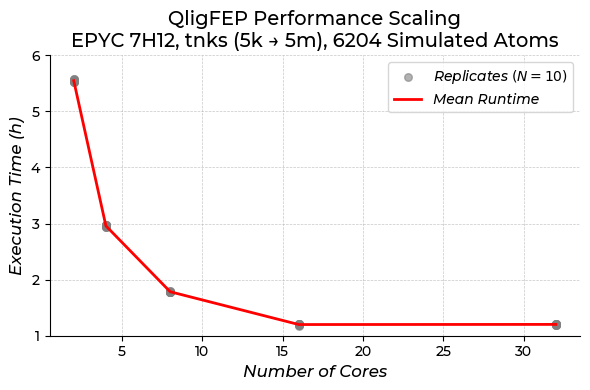

In [4]:
tick_font = load_google_font("Montserrat", weight=500)
label_font = load_google_font("Montserrat", weight=500, italic=True)
title_font = load_google_font("Montserrat", weight=500)

n_atoms = 6619
excluded_atoms = 415
total_n_atoms = n_atoms - excluded_atoms


def set_font_properties(ax, tick_font=tick_font, label_font=label_font, title_font=title_font):
    ax.set_xlabel(ax.get_xlabel(), fontproperties=label_font, size=12)
    ax.set_ylabel(ax.get_ylabel(), fontproperties=label_font, size=12)
    ax.set_title(ax.get_title(), fontproperties=title_font, size=14)
    for label in ax.get_xticklabels():
        label.set_fontproperties(tick_font)
        label.set_fontsize(10)
    for label in ax.get_yticklabels():
        label.set_fontproperties(tick_font)
        label.set_fontsize(10)
    ax.legend(prop=label_font)


fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(
    timedata["Cores"], timedata["total_hours"], color="gray", alpha=0.6, s=30, label="Replicates $(N=10)$"
)
agg_df = timedata.groupby("Cores")["total_hours"].agg(Mean="mean").reset_index()
ax.plot(agg_df["Cores"], agg_df["Mean"], color="red", lw=2, markersize=6, label="Mean Runtime")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_axisbelow(True)
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
ax.set_xlabel("Number of Cores")
ax.set_ylabel("Execution Time (h)")
ax.set_title(f"QligFEP Performance Scaling\nEPYC 7H12, tnks (5k → 5m), {total_n_atoms} Simulated Atoms")

ax.set_ylim(1, 6)
set_font_properties(ax)  # set all the properties
plt.tight_layout()

fig = plt.gcf()
fig.savefig("figures/runtime_efficiency.png", dpi=300, bbox_inches="tight")
fig.savefig("figures/runtime_efficiency.svg", bbox_inches="tight")

plt.show()